In [26]:
import pandas as pd
from pandas_datareader import data as pdr
import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def generate_csv(symbol,filename):
    current_date=datetime.datetime.now()
    start_date=datetime.datetime(current_date.year-2,1,1)
    df = pdr.get_data_yahoo(symbol,start_date,current_date).reset_index()
    df.to_csv(filename)

In [9]:
url = "all.csv"
generate_csv('ALL',url)

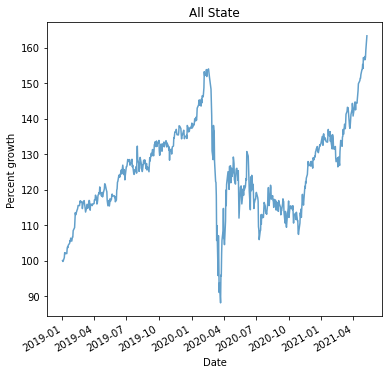

In [29]:
df=pd.read_csv(url,parse_dates=['Date'],index_col='Date')
#df['Open'].plot()
fig,ax=plt.subplots(figsize=(6,6))
df['All']=df['Open'].div(df['Open'].iloc[0]).mul(100)
df['All'].plot(ax=ax,alpha=.7)
plt.ylabel("Percent growth")
plt.title("All State")
plt.show()

<AxesSubplot:xlabel='Date'>

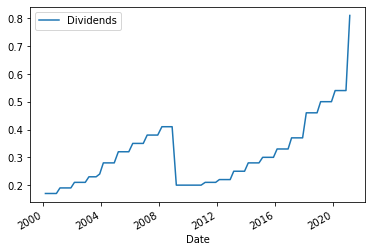

In [80]:
dividend_df=pd.read_csv('all_state_dividend.csv',parse_dates=['Date'],index_col='Date')

dividend_df.plot()

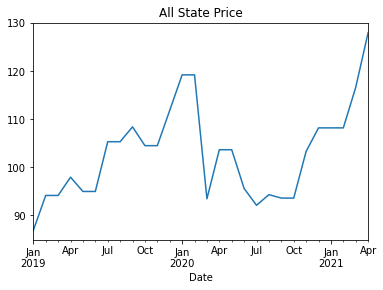

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


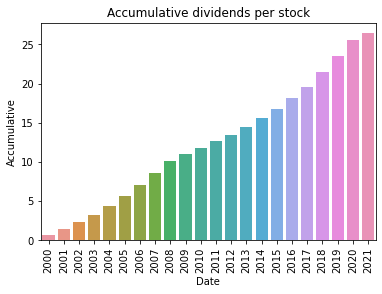

In [113]:
months=dividend_df.index.month
years=dividend_df.index.year
grouped=dividend_df.groupby([years,months])['Dividends'].sum()
grouped=grouped.unstack()

#print(grouped.values)
#print(grouped.index)
fp=dividend_df.pivot_table(index=dividend_df.index.year,columns=dividend_df.index.month,values=['Dividends'],aggfunc='sum')
fp['Totals'] = fp.sum(axis='columns')
fp['Accumulative']=fp['Totals'].cumsum()
#print(fp)

first_price=df['Open'].iloc[0]
allstate_returns=df['Open'].pct_change()
allstate_returns_plus_one = allstate_returns.add(1)
allstate_accumulative=allstate_returns_plus_one.cumprod()

allstate_accumulative=allstate_accumulative.mul(first_price)

allstate_accumulative.asfreq('M').ffill().plot()
plt.title('All State Price')
plt.show()

#.plot()
#print(df['Open']*df['Open_PCT'])

sns.barplot(fp.index,fp['Accumulative'])
plt.xticks(rotation=90)
plt.title("Accumulative dividends per stock")
plt.show()
#fp=pd.pivot_table(data=grouped,index=grouped.index,values=[grouped.values])
#print(fp)

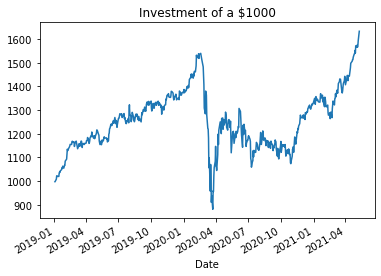

In [31]:
investment=1000
df_returns=df['Open'].pct_change()
df_returns_plus_one = df_returns.add(1)
df_cumulative_return = df_returns_plus_one.cumprod()
df_cumulative_return.mul(investment).plot()
plt.title("Investment of a $1000")
plt.show()